## 8. When Models Meet Data

#### 8.1.1 Data as Vectors

The data represent on table with N as number of examples (row) and D (dimension) as number of features (columns)

We can manipulate the data find potentially better representations by two ways:
1. finding lower-dimensional approximations of the original feature vector -> Principal Component Analysis (PCA), closely related to concepts of __eigenvalue__ and **singular value decomposition**
2. using nonlinear higher-dimensional combinations of the original feature vector -> explicit feature map(?), the main motivation for higher-dimensional representations is that we can construct new features which may take the learning problem easier(?)

## Eigenvalue

##### (Math Check) 2.7.1 Matrix Representation of Linear Mapping
vectors are objects that can be added together and multiplied by a scalar, and the resulting object is still a vector
notation:
1. B = (b1,...,bn) -> ordered basis
2. B = {b1,...,bn} -> unordered basis
3. B = [b1,...,bn] -> matrix whose columns are vectors

**definition 2.18 (coordinates)** -> this definitions is changing the existing vector on standard basis (e1, e2) to basis vector (I think this customizeable(?)) 

Example of coordinates changes on vector using basis vector (b1, b2) -> b1 = [1, -1]^T, b2 = [1, 1]^T

we have vector \
x = 2*e1 + 3*e2 

standard basis \
e1 = [1, 0]^T \
e2 = [0, 2]^T

vector x can be written as: \
x = 2 * [1, 0]^T + 3 * [0, 1]^T = [2, 3]^T

instead of using standard basis, we want to **represent the same vector** x using a different basis (b1, b2) \
b1 = [1, -1]^T \
b2 = [1, 1]^T 

x as linear combination of b1 and b2 \
x = c1*b1 + c2*b2

finding new coordinate c1, c2 \
x = c1*[1, -1]^T + c2*[1, 1]^T \
x = [[1, 1], [-1, 1]] * [c1, c2]^T = [2, 3]^T \
[c1, c2]^T = [[1, 1], [-1, 1]]^-1 * [2, 3]^T

[[1, 1], [-1, 1]]^-1: \
determinant = (1*1) - ((-1)*1) = 1 + 1 = 2

[[1, 1], [-1, 1]]^-1 = 0.5 * ( [[1, -1], [1, 1]] ) 

[c1, c2]^T = ( 0.5 * ( [[1, -1], [1, 1]] ) ) * [2, 3]^T

[c1, c2]^T = [-0.5, 2.5]^T

In [53]:
## Manual code

# original vector x
x = [[2], [3]]

# basis b1, b2
B = [
    [1, 1],
    [-1, 1]
]

def determinant_2x2(matrix):
    return (matrix[0][0] * matrix[1][1]) - (matrix[0][1] * matrix[1][0]) 

def inverse_2x2(matrix):
    det = determinant_2x2(matrix)

    if det == 0:
        raise ValueError("Matrix is singular, cannto find inverse.")

    inv_det = 1 / det
    inverse = [
        [matrix[1][1] * inv_det, -1 * matrix[0][1] * inv_det],
        [-1 * matrix[1][0] * inv_det, matrix [0][0] * inv_det]
    ]

    return inverse

B_inv= inverse_2x2(B)

def matrix_mult(B_inv, x):
    ## multiply two matrices A (m x n) and B (n x p)
    m = len(B_inv)
    n = len(B_inv[0])
    p = len(x[0]) 

    result = [[0] for _ in range(len(B_inv))]

    for i in range(m):
        for j in range(p):
            for k in range(n):
                result[i][j] += B_inv[i][k] * x[k][j]

    return result

x_new = matrix_mult(B_inv, x)

x_new

[[-0.5], [2.5]]

In [54]:
# Numpy Library

import numpy as np

x = np.array([[2],[3]])

B = np.array([[1, 1], [-1, 1]])

## inverse matrix
B_inv = np.linalg.inv(B)

## The matrix product can be performed using the @ operator (in python >=3.5)
x_new = B_inv @ x

x_new

array([[-0.5],
       [ 2.5]])

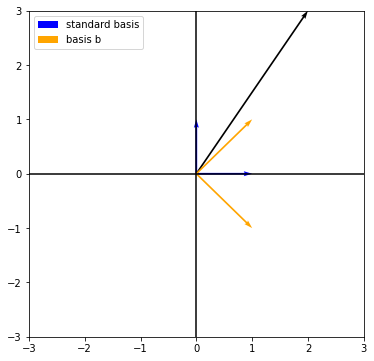

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')

## 
plt.quiver(0, 0 , 1, 0, angles='xy', scale_units='xy', scale=1, width=0.005, color='blue' ,label = 'standard basis')
plt.quiver(0, 0 , 0, 1, angles='xy', scale_units='xy', scale=1, width=0.005, color='blue')

plt.quiver(0, 0 , x[0], x[1], angles='xy', scale_units='xy', scale=1, width=0.005, color='black' )

b1 = np.array([1, -1])
b2 = np.array([1, 1])

plt.quiver(0, 0 , b1[0], b1[1], angles='xy', scale_units='xy', scale=1, width=0.005, color='orange', label = 'basis b')
plt.quiver(0, 0 , b2[0], b2[1], angles='xy', scale_units='xy', scale=1, width=0.005, color='orange' )

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.legend(loc='upper left')

**definition 2.19 (Transformation Matrix)** 

instead of changing one vector we can store multiple vectors in one metrics and represent them in the graph as a dot (end of vector position) instead of arrows. with this approach we can change these vectors using transformation matrix from one coordinate base to other coordinate base

**y_accent = A * x_accent**

A is the transformation matrix \
x_accent is the coordinate vector of x with respect to B coordinate \
y_accent is the coordinate vector of y with respect to C coordinate

this means transformation matrix can be used to map coordinates from B coordinate to C coordinate

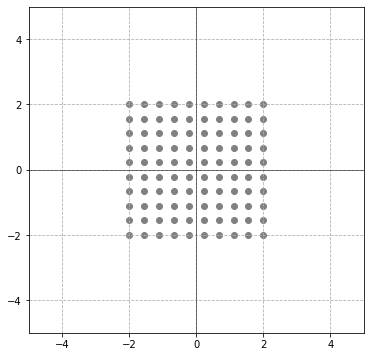

In [56]:
## example

import numpy as np
import matplotlib.pyplot as plt

# original data
x_values = np.linspace(-2, 2, 10) ### create an array consist of 10 numbers between -2 and 2 
y_values = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x_values, y_values) ### create rectangular grid combination of 10 numbers between -2 and 2 in x coordinates and y coordinates
original_points = np.vstack([X.ravel(), Y.ravel()]) ### X, Y coordinates under matrix 2 x combination of grid 

plt.figure(figsize = (6, 6))
plt.scatter(original_points[0], original_points[1], color = 'gray')

# beautifier
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color = 'black', linewidth = 0.5)
plt.axvline(0, color = 'black', linewidth = 0.5)
plt.grid(True, linestyle = '--')

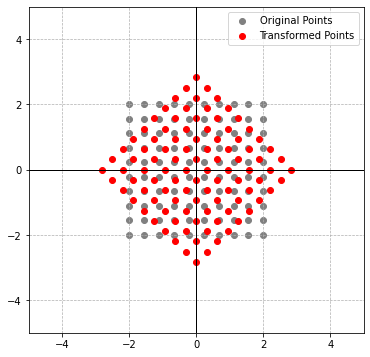

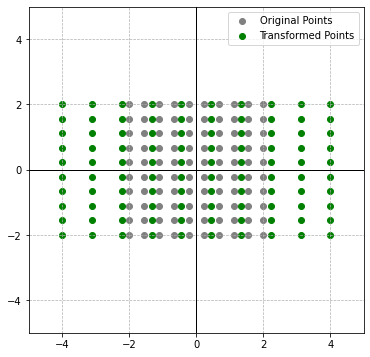

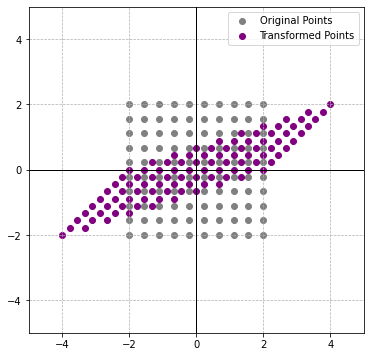

In [57]:
# from original data transform it using transform matrix

## List of Transform Matrix
theta = np.pi / 4 # 45 degress in radians
A1 = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

A2 = np.array([
    [2, 0],
    [0, 1]
])

A3 = np.array([
    [1.5, -0.5],
    [0.5, -0.5]
])

def plot_transformation(A, color = 'blue'):
    transform_points = A @ original_points

    plt.figure(figsize = (6, 6))
    plt.scatter(original_points[0], original_points[1], color = 'gray', label = 'Original Points')
    plt.scatter(transform_points[0], transform_points[1], color = color, label = 'Transformed Points')

    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.grid(True, linestyle = '--', linewidth = 0.7)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend()
    
plot_transformation(A1, color = 'red')
plot_transformation(A2, color = 'green')
plot_transformation(A3, color = 'purple')

plt.show()

##### (Math Check) Eigenvalue

EigenValue and EigenVetor are explaining characteristics of transformation matrix to alter vector (input) to stretch or span on linear line (for 2 Dimensional cases)

EigenValue -> describe Value of how much the vectors are stretching (lambda = 3, meaning the vectors are strech 3 times then initial position) \
EigenVector -> describe vector or direction of strech

it summarize by this mathematical equation

**A * v = lambda * v**

A = transformation matrix \
v = EigenVector \
lambda = EigenValue

because of on the left side is vector multiplication and on the right side is scalar-vector multiplication, so we need to so they have same format of multiplication \
A * v = lambda * I * v

I = Identitiy Matrix

the equation become \
(A * v) - (lambda * I * v) = 0 \
(A - (lambda * I)) * v = 0

because of the result should be 0, then there must be zero value between (A - (lambda * I)) or v. since the v is the input vector, it is unimportant information if v = 0 meaning there is no input so (A - (lambda * I)) must be zero

Zero in the matrix meaning zero in their determinant (0 scaling area of the matrix)
then become 

det|(A - (lambda * I))| = 0

for the 2x2 matrix \
det| [[a11 - lambda, a12], [a21, a22 - lambda]] | = 0

after we get lambda (EigenValue) we can get the EigenVector from transformation matrix to complete the mathematical equation above

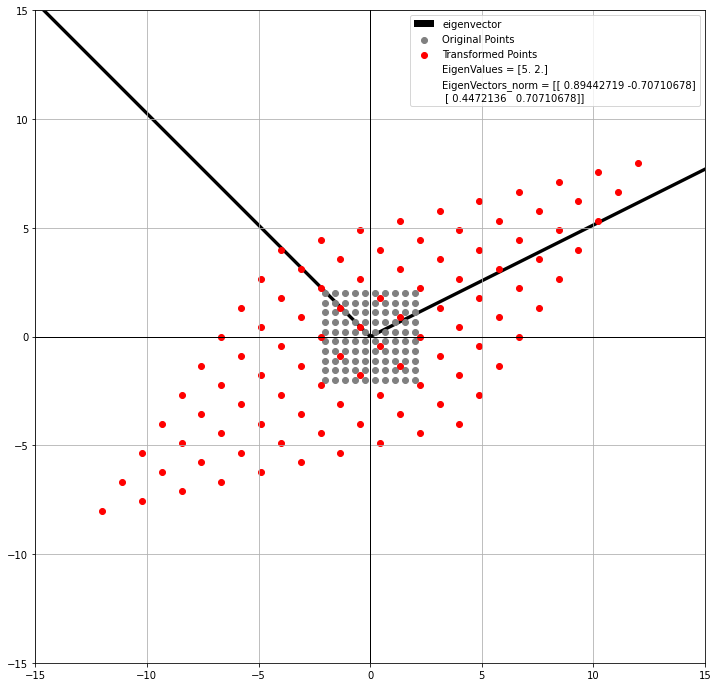

In [81]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [4, 2],
    [1, 3]
])

EigenValues, EigenVectors_norm = np.linalg.eig(A) ## only for square matrix

plt.figure(figsize = (12, 12))

## EigenVector mapping
plt.quiver(EigenVectors_norm[0][0], EigenVectors_norm[1][0], width = 0.005, color = 'black', label = 'eigenvector', scale = 1)
plt.quiver(EigenVectors_norm[0][1], EigenVectors_norm[1][1], width = 0.005, color = 'black', scale = 1)

## point changes
plt.scatter(original_points[0], original_points[1], color = 'gray', label = 'Original Points')
transform_points = A @ original_points
plt.scatter(transform_points[0], transform_points[1], color = 'red', label = 'Transformed Points')

## legend info
plt.plot([], [], ' ', label=f"EigenValues = {EigenValues}")
plt.plot([], [], ' ', label=f"EigenVectors_norm = {EigenVectors_norm}")

plt.axvline(color = 'black', lw = 1)
plt.axhline(color = 'black', lw = 1)
plt.grid()
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.legend()
plt.show()

In [111]:
# make it as function to test it around
import numpy as np
import matplotlib.pyplot as plt

def eigenvector_plot(A, original_points, color, figsize):
    
    EigenValues, EigenVectors_norm = np.linalg.eig(A) ## only for square matrix

    plt.figure(figsize = figsize)

    ## EigenVector mapping
    if EigenValues.imag [0] == 0:
        plt.quiver(EigenValues[0] * EigenVectors_norm[0][0], EigenValues[0] * EigenVectors_norm[1][0], width = 0.005, color = 'black', label = 'eigenvector', scale = 1)
    if EigenValues.imag [1] == 0:
        plt.quiver(EigenValues[1] * EigenVectors_norm[0][1], EigenValues[1] * EigenVectors_norm[1][1], width = 0.005, color = 'black', scale = 1)

    ## point changes
    plt.scatter(original_points[0], original_points[1], color = 'gray', label = 'Original Points')
    transform_points = A @ original_points
    plt.scatter(transform_points[0], transform_points[1], color = color, label = 'Transformed Points')

    ## legend info
    plt.plot([], [], ' ', label=f"EigenValues = {EigenValues}")
    plt.plot([], [], ' ', label=f"EigenVectors_norm = {EigenVectors_norm}")

    plt.axvline(color = 'black', lw = 1)
    plt.axhline(color = 'black', lw = 1)
    plt.grid()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend()


### Example of transformation matrix figure 4.4

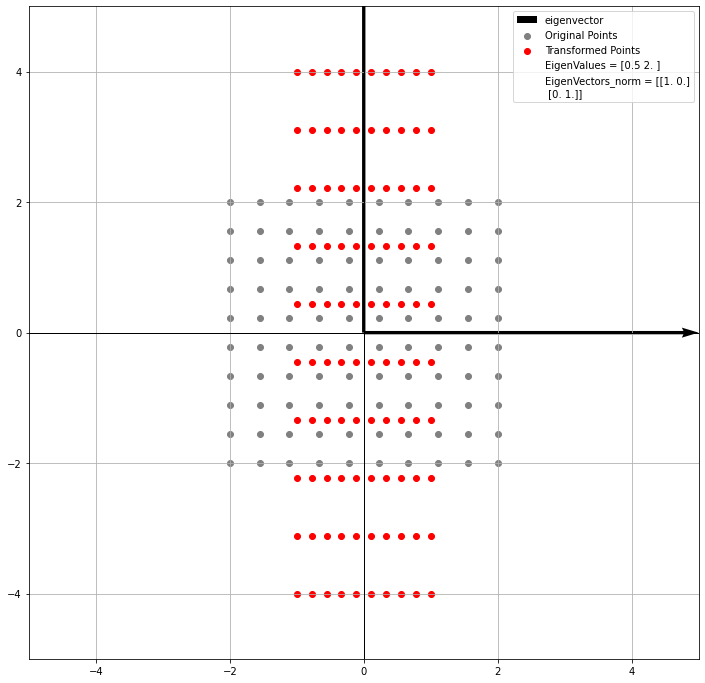

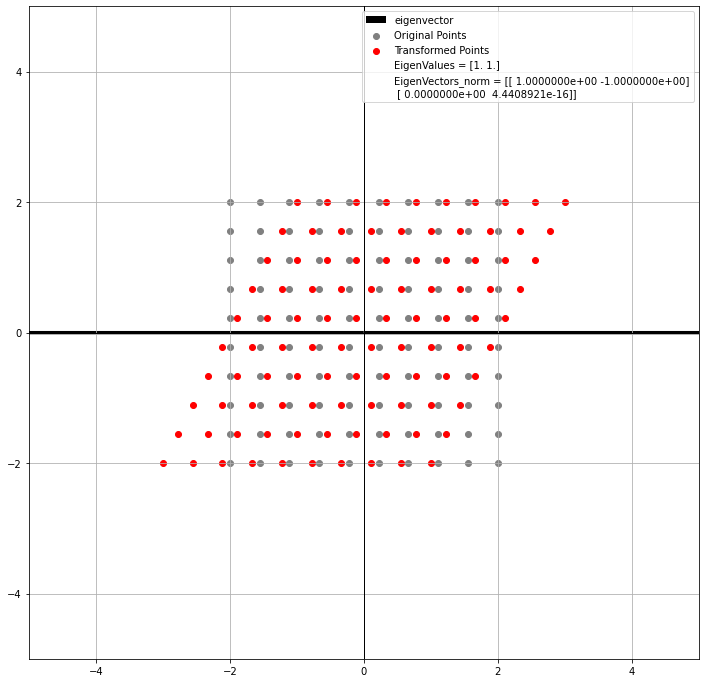

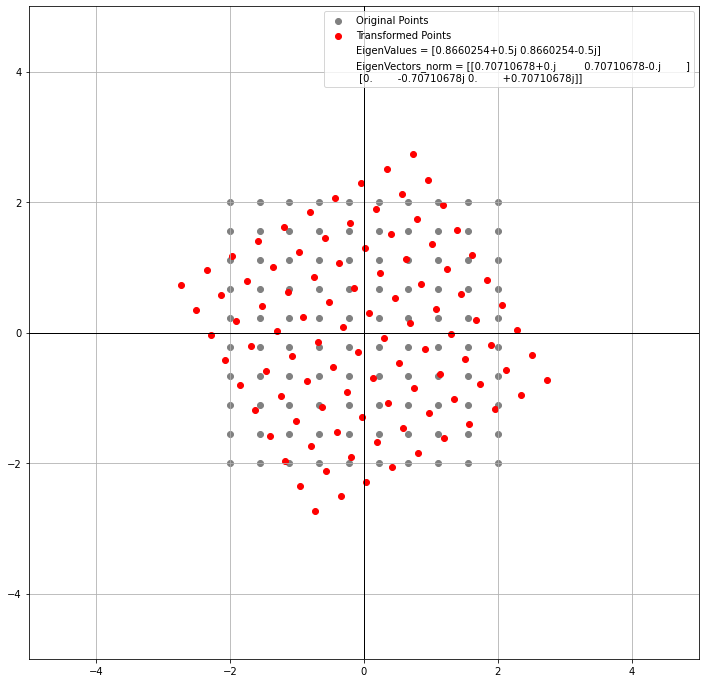

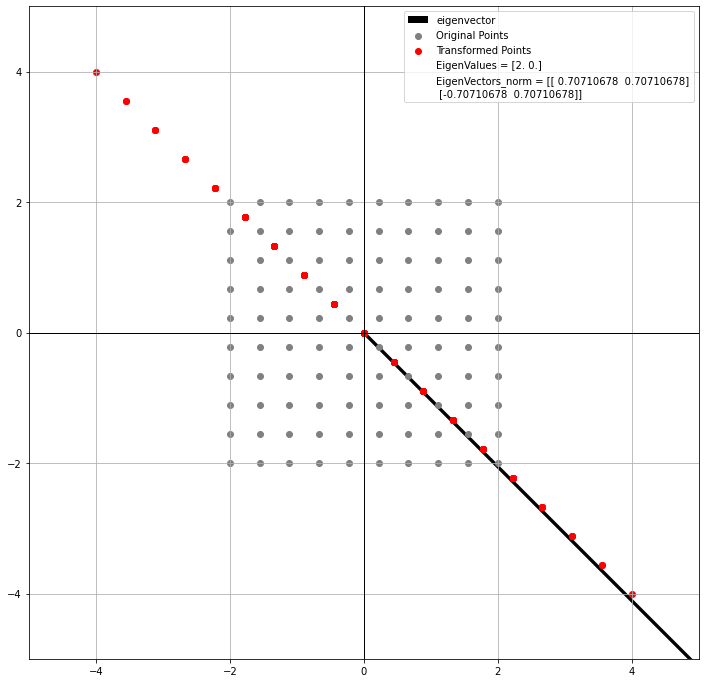

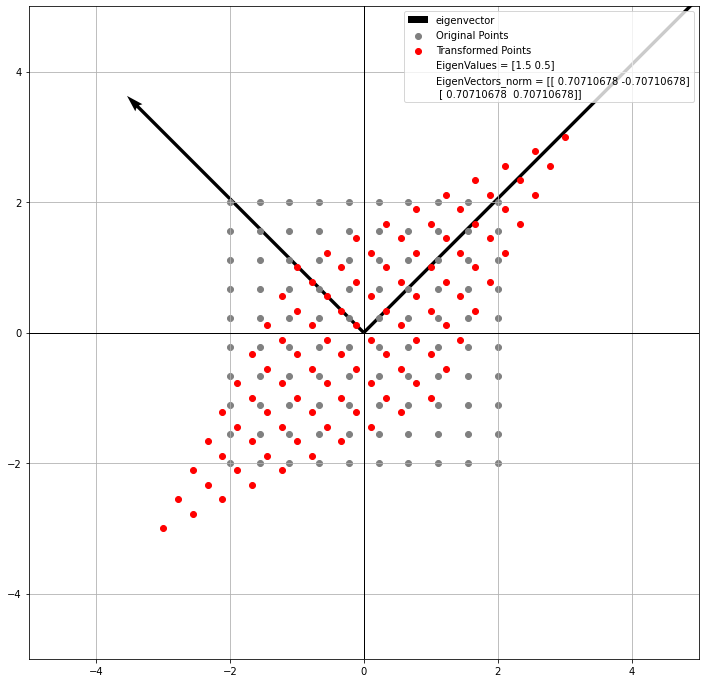

In [112]:
A1 = np.array([
    [0.5, 0],
    [0, 2]
])

A2 = np.array([
    [1, 0.5],
    [0, 1]
])

theta = np.pi / 6 # 45 degress in radians
A3 = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])


A4 = np.array([
    [1, -1],
    [-1, 1]
])

A5 = np.array([
    [1, 0.5],
    [0.5, 1]
])

transform_matrixs = [A1, A2, A3, A4, A5]

for transform_matrix in transform_matrixs: 
    
    eigenvector_plot(transform_matrix, original_points, 'red', figsize = (12, 12))
    plt.show()

## Singular Value Decomposition

In [1]:
import numpy as np 

A = np.array([
    [5, 4, 1],
    [5, 5, 0],
    [0, 0, 5],
    [1, 0, 4],
])

In [7]:
np.linalg.svd(A)

(array([[-0.67096878,  0.02362898,  0.46466034, -0.57735027],
        [-0.7197425 ,  0.20541998, -0.47585716,  0.46188022],
        [-0.09389374, -0.77048084, -0.52682373, -0.34641016],
        [-0.15151103, -0.6029955 ,  0.52925183,  0.57735027]]),
 array([9.6438109 , 6.36389089, 0.70555232]),
 array([[-0.73674894, -0.65146317, -0.1810987 ],
        [ 0.0852072 ,  0.17624687, -0.9806512 ],
        [ 0.67077622, -0.73792464, -0.07434034]]))

In [11]:
np.linalg.eig(A @ A.T)

(array([ 9.30030887e+01,  4.04991072e+01, -1.00428127e-14,  4.97804078e-01]),
 array([[ 0.67096878,  0.02362898,  0.57735027,  0.46466034],
        [ 0.7197425 ,  0.20541998, -0.46188022, -0.47585716],
        [ 0.09389374, -0.77048084,  0.34641016, -0.52682373],
        [ 0.15151103, -0.6029955 , -0.57735027,  0.52925183]]))

In [12]:
np.linalg.eig(A.T @ A)

(array([93.00308868,  0.49780408, 40.49910724]),
 array([[ 0.73674894,  0.67077622, -0.0852072 ],
        [ 0.65146317, -0.73792464, -0.17624687],
        [ 0.1810987 , -0.07434034,  0.9806512 ]]))

In [14]:
inverse_test = np.array([
    [0.73674894, 0.67077622, -0.0852072],
    [0.65146317, -0.73792464, -0.17624687],
    [0.1810987, -0.07434034, 0.9806512 ]]
)

np.linalg.inv(inverse_test)

array([[ 0.73674894,  0.65146317,  0.1810987 ],
       [ 0.67077622, -0.73792464, -0.07434034],
       [-0.0852072 , -0.17624687,  0.9806512 ]])